# 学習方法の例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.layers import *
from sklearn.model_selection import train_test_split
import pickle

C:\Users\onoza\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


## データを読む1

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
#train_data = np.load("../1_data/imagedatagenerator/train_data_expansion.npy")
#train_label = np.load("../1_data/imagedatagenerator/train_label_expansion.npy")

print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

#データ拡張
train_data_expansion = np.load("../1_data/imagedatagenerator/train_data_expansion.npy")
train_label_expansion = np.load("../1_data/imagedatagenerator/train_label_expansion.npy")
print("train_data_expansion.shape=", train_data_expansion.shape)
print("train_label_expansion.shape=", train_label_expansion.shape)

train_data = np.concatenate([train_data, train_data_expansion])
train_label = np.concatenate([train_label, train_label_expansion])

print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)
train_data_expansion.shape= (6000, 1, 28, 28)
train_label_expansion.shape= (6000, 15)
train_data.shape= (9000, 1, 28, 28)
train_label.shape= (9000, 15)


In [3]:
from PIL import Image

def show_image(img): 
    pil_img = Image.fromarray(img)
    plt.imshow(pil_img)
    plt.gray()
    plt.show()
    return

#for i in range(3000):
#    
#    if(0.99<np.random.rand()):        
#        img = train_data[i]
#        img = img.reshape(28,28)
#        img = np.uint8(img*255)
#        show_image(img)
#
#        img = train_data[3000+i]
#        img = img.reshape(28,28)
#        img = np.uint8(img*255)
#        show_image(img)
#

In [4]:
# 正規化
print(train_data.max())
print(train_data.min())

train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
# print(train_data)

255.0
0.0


In [5]:
# 配列形式変更
#train_data = train_data.reshape(-1, 28*28)
#print("train_data.shape=", train_data.shape)

## trainとtestに分割する

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state=1234, shuffle=True)

print(X_train.shape, X_test.shape)

(6300, 1, 28, 28) (2700, 1, 28, 28)


## 学習

In [7]:
#%%debug
epochs = 100
batch_size = 100#余りがあるとエラーになる
lr = 0.01

# 繰り返し回数
xsize = X_train.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

#optimizer = RMSProp(lr=0.001, rho=0.9)
optimizer = Adam(lr=0.001, rho1=0.9, rho2=0.999)
#optimizer = SGD(lr=0.01)




# CNNのオブジェクト生成
snet = SimpleConvNet(batch_size, input_dim=(1, 28, 28), 
                     conv_param={'filter_num':32, 'filter_size':3, 'pad':0, 'stride':1},
                     pool_param={'pool_size':2, 'pad':0, 'stride':2},
                     hidden_size=100, output_size=15, weight_init_std=0.01, weight_decay_lambda=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):
    print("epoch=%s"%epoch)

    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        #print("it=%s"%it)

        """
        ランダムなミニバッチを順番に取り出す
        """
        #print("it=", it)
        mask = idx[batch_size*it : batch_size*(it+1)]

        # ミニバッチの生成
        x_train = X_train[mask]
        t_train = y_train[mask]

        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = snet.gradient(x_train, t_train)

        # 更新
        optimizer.update(snet.params, grads)

    ## 学習経過の記録

    # 訓練データにおけるloss
#     print("calculating train_loss")    
    train_loss.append(snet.loss(X_train,  y_train))

#     print("calculating test_loss")
    # テストデータにおけるloss
    test_loss.append(snet.loss(X_test, y_test))

#     print("calculating train_accuracy")
    # 訓練データにて精度を確認
    train_accuracy.append(snet.accuracy(X_train, y_train))
    
#     print("calculating test_accuracy")
    # テストデータにて精度を算出
    test_accuracy.append(snet.accuracy(X_test, y_test))
    
    print(train_accuracy[-1], test_accuracy[-1])
    
    #テストデータで98.5%の精度が出たら学習終了
    if(test_accuracy[-1] > 0.985):
        break
        

epoch=0
0.7246031746031746 0.715925925925926
epoch=1
0.8658730158730159 0.8577777777777778
epoch=2
0.9185714285714286 0.9037037037037037
epoch=3
0.9303174603174603 0.9225925925925926
epoch=4
0.8701587301587301 0.8588888888888889
epoch=5
0.9555555555555556 0.9366666666666666
epoch=6
0.97 0.9537037037037037
epoch=7
0.9476190476190476 0.9355555555555556
epoch=8
0.9569841269841269 0.9485185185185185
epoch=9
0.9606349206349206 0.9359259259259259
epoch=10
0.9765079365079365 0.9555555555555556
epoch=11
0.9877777777777778 0.9692592592592593
epoch=12
0.9914285714285714 0.9777777777777777
epoch=13
0.9665079365079365 0.9481481481481482
epoch=14
0.9655555555555555 0.952962962962963
epoch=15
0.9858730158730159 0.9766666666666667
epoch=16
0.9784126984126984 0.9651851851851851
epoch=17
0.9787301587301588 0.9603703703703703
epoch=18
0.9911111111111112 0.9774074074074074
epoch=19
0.9738095238095238 0.9603703703703703
epoch=20
0.9896825396825397 0.9711111111111111
epoch=21
0.9852380952380952 0.964814814

    train_loss  test_loss  train_accuracy  test_accuracy
0     0.932482   0.951839        0.724603       0.715926
1     0.532027   0.566352        0.865873       0.857778
2     0.333487   0.374988        0.918571       0.903704
3     0.304450   0.352478        0.930317       0.922593
4     0.444893   0.480953        0.870159       0.858889
5     0.181903   0.242468        0.955556       0.936667
6     0.171350   0.215054        0.970000       0.953704
7     0.241632   0.272824        0.947619       0.935556
8     0.217195   0.253523        0.956984       0.948519
9     0.183673   0.244731        0.960635       0.935926
10    0.187893   0.228256        0.976508       0.955556
11    0.114680   0.144313        0.987778       0.969259
12    0.104226   0.137724        0.991429       0.977778
13    0.166772   0.195060        0.966508       0.948148
14    0.176783   0.218087        0.965556       0.952963
15    0.108938   0.135845        0.985873       0.976667
16    0.123156   0.157325      

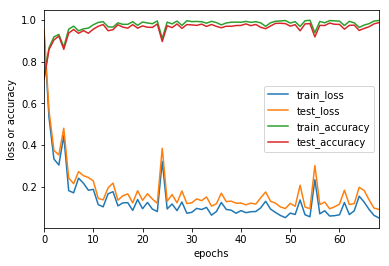

In [8]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
print(df_log)
df_log.plot()
plt.ylabel("loss or accuracy")
plt.xlabel("epochs")
plt.show()

predict_label ka
correct_label ku


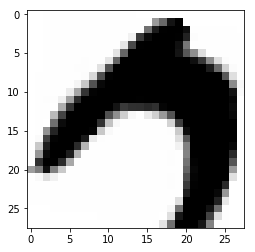

predict_label a
correct_label su


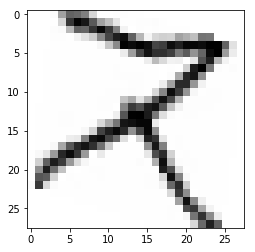

predict_label e
correct_label ko


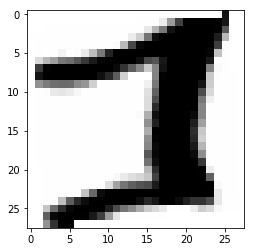

predict_label so
correct_label si


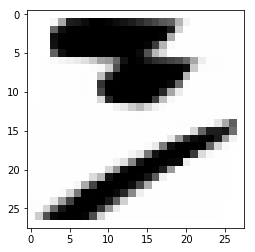

predict_label u
correct_label ke


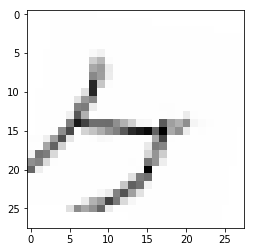

predict_label ka
correct_label ke


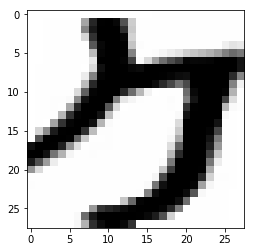

predict_label a
correct_label ke


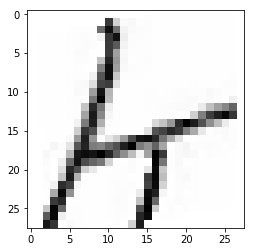

predict_label sa
correct_label ke


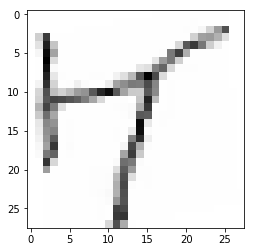

predict_label u
correct_label ku


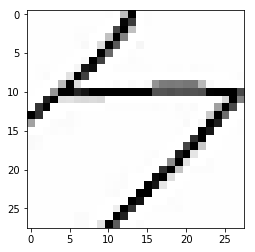

predict_label u
correct_label sa


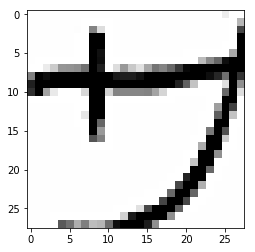

predict_label u
correct_label sa


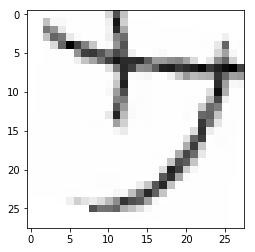

predict_label ka
correct_label se


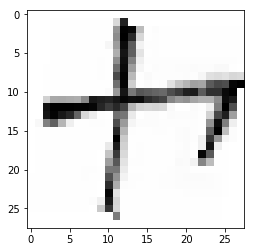

predict_label ki
correct_label e


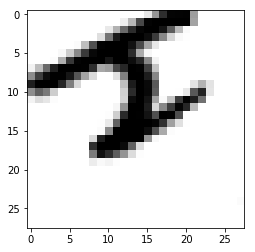

predict_label a
correct_label su


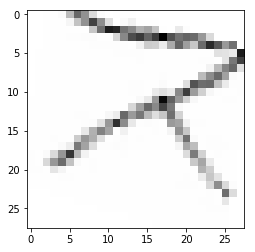

predict_label ku
correct_label ko


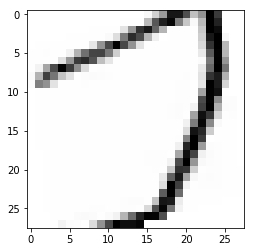

predict_label ka
correct_label ke


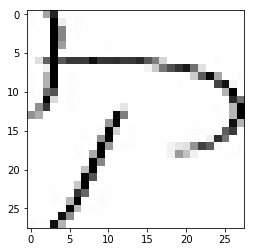

predict_label ko
correct_label su


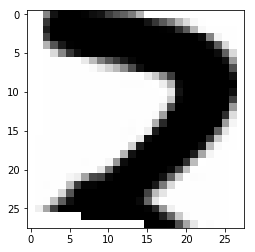

predict_label ke
correct_label ku


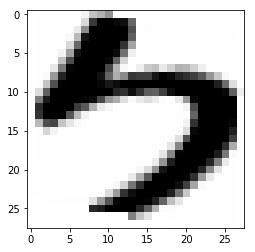

predict_label se
correct_label su


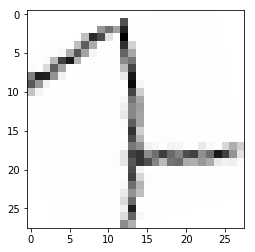

predict_label o
correct_label ka


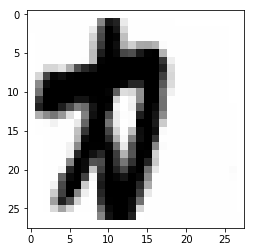

predict_label ku
correct_label su


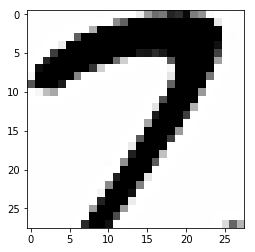

predict_label u
correct_label si


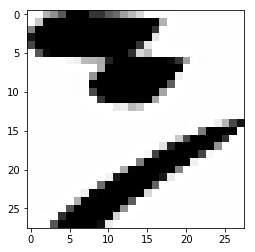

predict_label ku
correct_label su


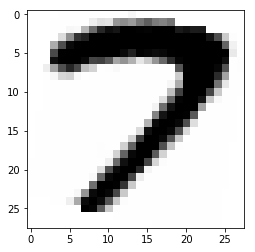

predict_label ko
correct_label ku


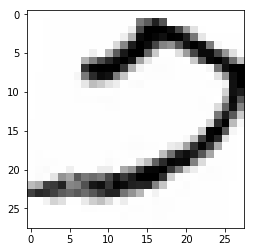

predict_label se
correct_label ka


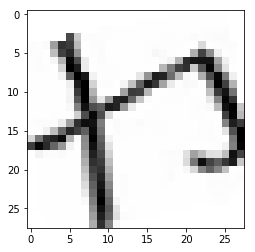

predict_label ku
correct_label ka


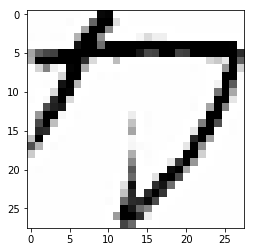

predict_label a
correct_label ka


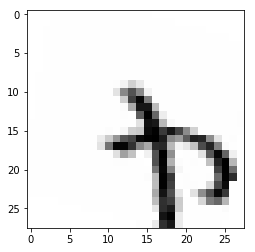

predict_label u
correct_label ku


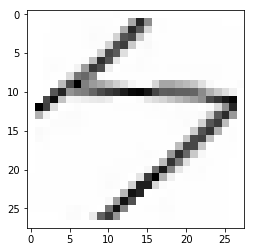

predict_label se
correct_label e


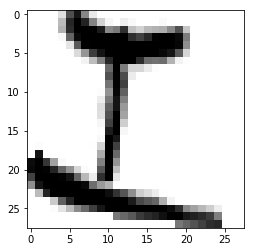

predict_label si
correct_label so


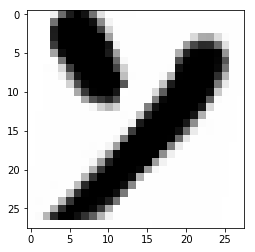

predict_label sa
correct_label ke


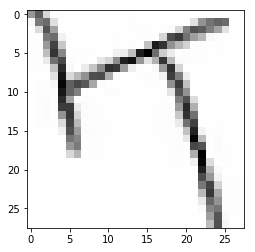

predict_label se
correct_label ka


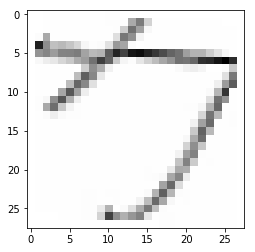

predict_label ko
correct_label su


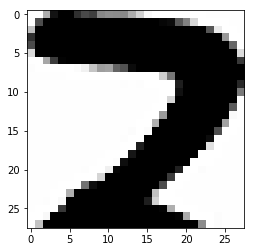

predict_label ko
correct_label ke


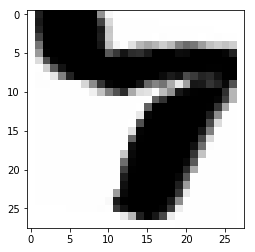

predict_label u
correct_label ku


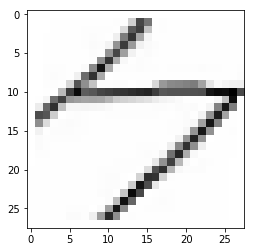

predict_label ka
correct_label ku


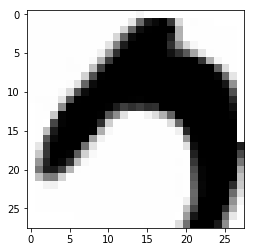

predict_label ko
correct_label so


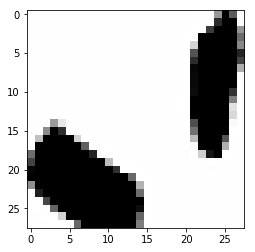

predict_label ka
correct_label se


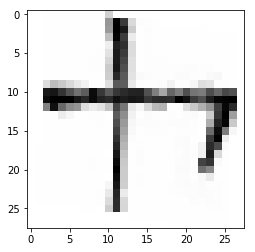

miss_summary

a 0.0
i 0.0
u 0.0
e 2.0
o 0.0
ka 5.0
ki 0.0
ku 7.0
ke 7.0
ko 2.0
sa 2.0
si 2.0
su 7.0
se 2.0
so 2.0


In [12]:
#間違った画像を表示
snet.display_miss_img(X_test, y_test)

## 学習済みモデルの出力

In [10]:
#with open("katakana_model.pickle", "wb") as f:
#    pickle.dump(snet, f)

In [11]:

#print(snet.params['W1'])



#W1~4, b1~4を抽出
for idx in range(1, 7):
    with open("model_params\katakana_model_W" + str(idx) + ".pickle", "wb") as f:
        pickle.dump(snet.params['W' + str(idx)], f)
    with open("model_params\katakana_model_b" + str(idx) + ".pickle", "wb") as f:
        pickle.dump(snet.params['b' + str(idx)], f)

#バッチ正規化レイヤのパラメータを抽出
with open("model_params\katakana_model_gamma1.pickle", "wb") as f:
    pickle.dump(snet.params['gamma1'], f)
with open("model_params\katakana_model_beta1.pickle", "wb") as f:
    pickle.dump(snet.params['beta1'], f)
with open("model_params\katakana_model_moving_mean.pickle", "wb") as f:
    pickle.dump(snet.layers['BatchNorm1'].moving_mean, f)
with open("model_params\katakana_model_moving_var.pickle", "wb") as f:
    pickle.dump(snet.layers['BatchNorm1'].moving_var, f)


    

#print("snet.params['beta1']", snet.params['beta1'])
#print("snet.params['gamma1']", snet.params['gamma1'])
#print(snet.layers['BatchNorm1'].moving_mean)
#print(snet.layers['BatchNorm1'].moving_var)